In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Задание 6.1
Создать файл с зашумлением изображения шумом типа соль-перец.


Сначала создадим кортеж RGB с красным, зелёным, сисним цветом и функцию зашумления, принимающую на вход изображение и вероятность зашумления.

In [2]:
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0, 255)
rgb = [red, green, blue]

def sp_noise(image, prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn > thres:
                output[i][j] = random.choice(rgb)
            else:
                output[i][j] = image[i][j]
    
    return output

Загрузим изображение и применим к нему нашу функцию

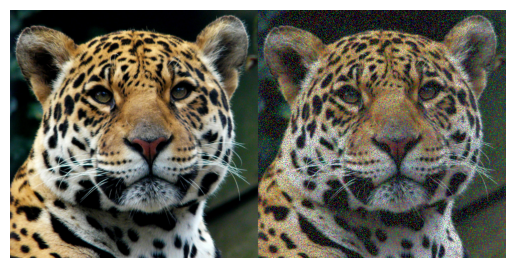

In [3]:
image = cv2.imread('images/jaguar.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (900, 900))

noise_img = sp_noise(image,0.3)

res = np.hstack((image, noise_img))
noise_img = cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('images/Noise.jpg', noise_img)
plt.axis('off')
plt.imshow(res);

# Задание 6.2
Провести сглаживание изображения с помощью функции cv2.filter2D (), используя ядро 5×5.

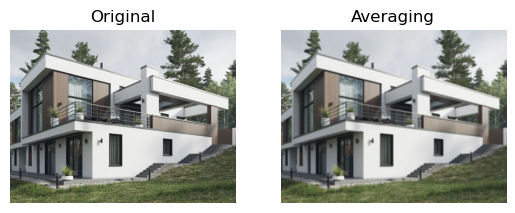

In [4]:
img = cv2.imread ('images/dom.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5), np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.axis('off')
plt.show()

# Задание 6.3
Провести усреднение изображения с помощью функции cv2.blur (), используя ядро 5×5.

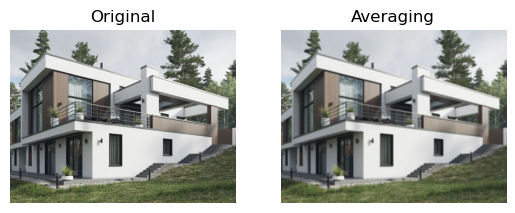

In [5]:
img = cv2.imread ('images/dom.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(img, (5, 5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.axis('off')
plt.show()

# Задание 6.4
Провести фильтрацию изображения по Гауссу, используя ядро 5×5.

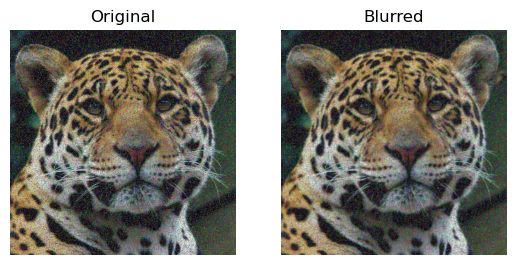

In [6]:
img = cv2.imread ('images/Noise.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.axis('off')
plt.show()

# Задание 6.5
Добавить к исходному изображению 20–50% шума. Провести медианную фильтрацию изображения, используя ядро 5x5.

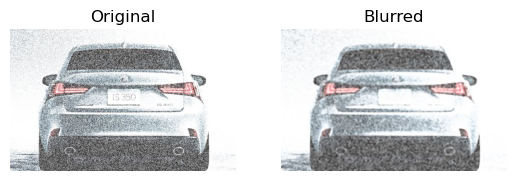

In [7]:
img = cv2.imread ('images/median.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.axis('off')
plt.show()

# Задание 6.6 
Создать файл с изображением, в котором обязательно присутствуют вертикальные и горизонтальные линии. С помощью оператора Собеля обнаружить и выделить эти линии.

In [8]:
img = cv2.imread ('images/dom.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (900, 600))

Теперь применим оператор Собеля для горизонтальных и вертикальных линий.

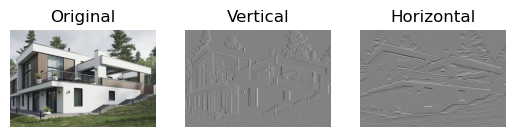

In [9]:
sobel_vertical = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_vertical = cv2.Sobel(sobel_vertical, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.normalize(sobel_vertical, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

sobel_horizontal = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_horizontal = cv2.Sobel(sobel_horizontal, cv2.CV_64F, 0, 1, ksize=5)
sobel_horizontal = cv2.normalize(sobel_horizontal, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(sobel_vertical),plt.title('Vertical')
plt.axis('off')
plt.subplot(133),plt.imshow(sobel_horizontal),plt.title('Horizontal')
plt.axis('off')
plt.show()

# Задание 6.7. 
Сравнить оба способа для горизонтального фильтра Собела с преобразованием в cv2.CV_8U и без него.

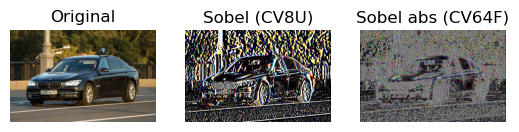

In [10]:
img = cv2.imread('images/bmw.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sobelx8u = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
sobelx64f = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(sobelx8u),plt.title('Sobel (CV8U)')
plt.axis('off')
plt.subplot(133),plt.imshow(sobel_8u),plt.title('Sobel abs (CV64F)')
plt.axis('off')
plt.show()

# Задание 6.8 
Создать файл с изображением, который обязательно содержит вертикальные и горизонтальные линии. С помощью оператора Превитта обнаружить и выделить эти линии.

In [11]:
img = cv2.imread('images/dom.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (900, 600))

Создадим маски для X и Y, а затем нарисуем линии функцией cv2.filter2D - Функция соединения изображения с ядром, здесь 1 – это
глубина изображения (если значение отрицательное, то глубина соответствует исходному изображению, как и cv2.CV_64F)

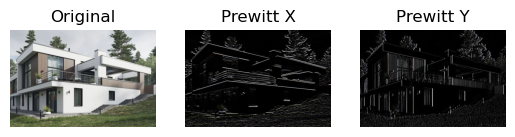

In [12]:
kernel1 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
kernel2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

img_prewittx = cv2.filter2D(img, -1, kernel1)
img_prewitty = cv2.filter2D(img, -1, kernel2)

plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(img_prewittx), plt.title('Prewitt X')
plt.axis('off')
plt.subplot(133),plt.imshow(img_prewitty), plt.title('Prewitt Y')
plt.axis('off')
plt.show()

# Задание 6.9 
Используя оператор Робертса, выделить линии на изображении.

In [13]:
img = cv2.imread('images/bmw.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (900, 600))

Создадим маски ядер оператора Робертса для осей X и Y, а затем применим их для выделения линий с помощью функции cv2.filter2D

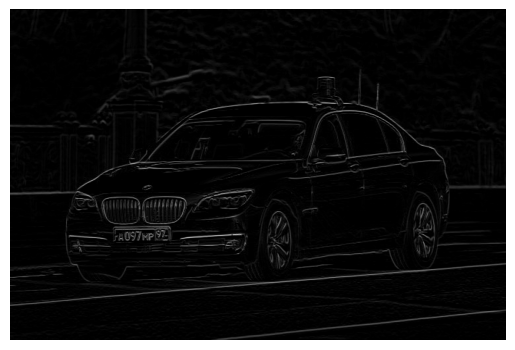

In [14]:
kernel1 = np.array([[-1, 0], [0, 1]])
kernel2 = np.array ([[0, -1], [1, 0]])

img_robx = cv2.filter2D(img, -1, kernel1)
img_roby = cv2.filter2D(img, -1, kernel2)

output_image = img_robx + img_roby

plt.axis('off')
plt.imshow(output_image);

# Задание 6.10 
Создать файл с изображением, в котором присутствуют перепады изображения. С помощью оператора Лапласа обнаружить и выделить эти перепады.

Оператор Лапласа подчеркивает разрывы, скачки яркости и ослабляет плавное изменение яркости. Для повышения резкости изображение, обработанное оператором Лапласа, накладывают на исходное изображение.

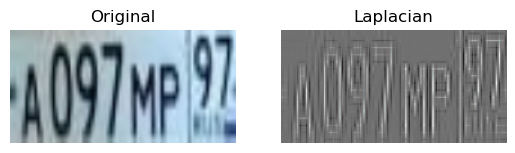

In [15]:
img = cv2.imread('images/o001oo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.axis('off')
plt.subplot(122),plt.imshow(laplacian),plt.title('Laplacian')
plt.axis('off')
plt.show()